✅ PROJECT OVERVIEW

Goal: Input a Reddit user profile URL → Scrape their posts/comments → Analyze with Gemini → Output a user persona with citations to a .txt file.

-----------------------------------------------------------------------------------------------------------

In [20]:
import os
import praw
from dotenv import load_dotenv
import google.generativeai as genai

In [21]:
# Load Gemini API Key
load_dotenv()
genai.configure(api_key=os.getenv("GEMINI_API_KEY"))

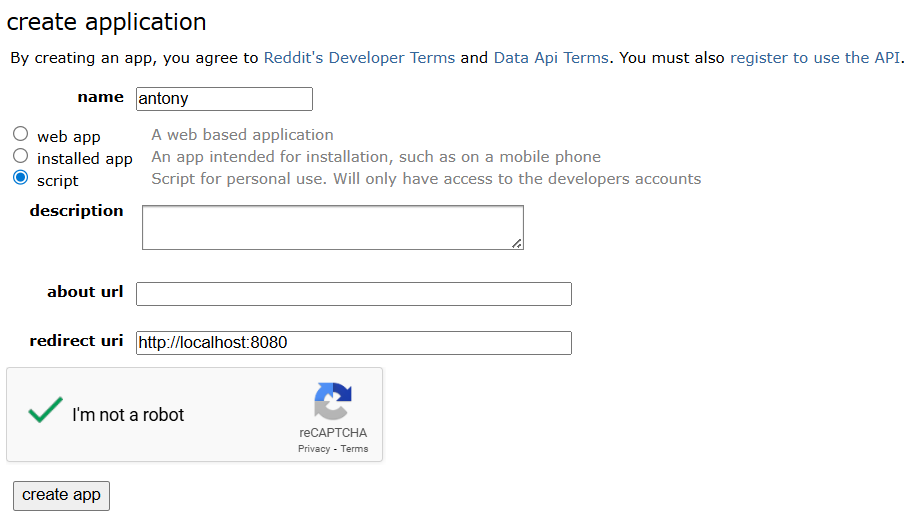

In [22]:
# reddit = praw.Reddit(
#     client_id="OEy_ckwU9LwsHrJs7KXs0Q",
#     client_secret="EXcJAlY0bQiWHWKnFGVk3sq8hAFl8Q",
#     user_agent="RedditPersonaScript by /u/antonychacko"
# )


In [23]:
load_dotenv()

reddit = praw.Reddit(
    client_id=os.getenv("REDDIT_CLIENT_ID"),
    client_secret=os.getenv("REDDIT_CLIENT_SECRET"),
    user_agent="RedditPersonaScript by /u/antonychacko"
)

In [24]:
def extract_username(url):
    if "reddit.com/user/" in url:
        return url.rstrip('/').split("/")[-1]
    return url  # Assume it's already a username

def fetch_user_content(username, max_items=30):
    user = reddit.redditor(username)
    posts = []
    comments = []
    
    for post in user.submissions.new(limit=max_items):
        posts.append(f"Title: {post.title}\nBody: {post.selftext}")
    
    for comment in user.comments.new(limit=max_items):
        comments.append(f"Comment: {comment.body}")
    
    return posts, comments

def build_prompt(posts, comments):
    sample = "\n\n".join(posts[:5] + comments[:5])
    return f"""
You are an AI assistant tasked with creating a Reddit user persona based on this user's posts and comments.

For each trait (age, occupation, interests, location, personality), include the **text snippet** that helped you infer it.

Reddit Data:
{sample}
"""


Debugging

In [25]:
username = extract_username('https://www.reddit.com/user/kojied/')
print(f"Extracted username: {username}")

Extracted username: kojied


 Improve extract_username() Logic

In [26]:
def extract_username(url):
    if not url:
        return None
    url = url.strip()
    if "reddit.com/user/" in url:
        return url.rstrip('/').split("/")[-1]
    elif url.startswith("u/"):
        return url[2:]  # handle u/username format
    else:
        return url  # assume it's already a username

def main(user_url):
    username = extract_username('user_url')
    
    if not username:
        print("❌ Error: Could not extract a valid username from the input.")
        return None

    print(f"✅ Extracted username: {username}")
    print(f"🔍 Fetching Reddit data for u/{username}...")

    return username  # return for testing and chaining


In [29]:
def extract_username(url):
    if not url:
        return None
    url = url.strip()
    
    # Case 1: Full profile URL like https://www.reddit.com/user/kojied/
    if "reddit.com/user/" in url:
        return url.split("reddit.com/user/")[-1].strip("/")

    # Case 2: Short username like u/kojied
    elif url.startswith("u/"):
        return url[2:]  # strip 'u/'

    # Case 3: Already a plain username
    return url


In [30]:
def main(user_url):
    username = extract_username(user_url)
    
    if not username:
        print("❌ Error: Could not extract a valid username from the input.")
        return None

    print(f"✅ Extracted username: {username}")
    print(f"🔍 Fetching Reddit data for u/{username}...")
    return username


In [31]:
test_url = "https://www.reddit.com/user/kojied/"
username = main(test_url)

✅ Extracted username: kojied
🔍 Fetching Reddit data for u/kojied...


----------------------------------------------------------------------------------------------------------

Problem on Gemini i need to extract

In [32]:
for m in genai.list_models():
    if "generateContent" in m.supported_generation_methods:
        print(m.name)

models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-flash-latest
models/gemini-1.5-flash
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-2.5-pro-preview-03-25
models/gemini-2.5-flash-preview-04-17
models/gemini-2.5-flash-preview-05-20
models/gemini-2.5-flash
models/gemini-2.5-flash-preview-04-17-thinking
models/gemini-2.5-flash-lite-preview-06-17
models/gemini-2.5-pro-preview-05-06
models/gemini-2.5-pro-preview-06-05
models/gemini-2.5-pro
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-exp-image-generation
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-preview-image-generation
models/gemini-2.0-flash-lite-preview-02-05
models/gemini-2.0-flash-lite-preview
models/gemini-2.0-pro-exp
models/gemini-2.0-pro-exp

------------------------------------------------------------------------------------------------

am continue with - models/gemini-1.5-flash

--------------------------------------------------------------------------

In [36]:
def generate_persona(prompt, output_path):
    model = genai.GenerativeModel("models/gemini-1.5-flash")
    response = model.generate_content(prompt)
    
    with open(output_path, "w", encoding="utf-8") as f:
        f.write(response.text)

def main():
    user_url = input("Enter Reddit profile URL (e.g., https://www.reddit.com/user/kojied/): ")
    username = extract_username(user_url)

    print(f"Fetching Reddit data for u/{username}...")
    posts, comments = fetch_user_content(username)

    if not posts and not comments:
        print("No content found.")
        return

    prompt = build_prompt(posts, comments)
    output_file = f"persona_outputs/{username}_persona.txt"
    os.makedirs("persona_outputs", exist_ok=True)
    
    print("Generating persona using Gemini AI...")
    generate_persona(prompt, output_file)
    print(f"Persona saved to: {output_file}")

if __name__ == "__main__":
    main()

Fetching Reddit data for u/kojied...
Generating persona using Gemini AI...
Persona saved to: persona_outputs/kojied_persona.txt
